**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства. Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

**Описание данных**

Вы будете работать с тремя датасетами:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv
Вы можете их скачать, нажав на название каждого.
Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 
Описание данных:
-id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
!pip install scikit-learn==1.1.3 -q
!pip install missingno -q
!pip install phik -q

In [49]:
import pandas as pd
import seaborn as sns
import phik
from phik import resources, phik_matrix
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error,
                             confusion_matrix,
                             accuracy_score, 
                             recall_score, 
                             precision_score)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

pd.set_option('display.max_columns', None)

display(df_main.sample(10))
display(df_dad.sample(10))
display(df_buy.sample(10))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
306,307,6561,"16,5",2211,"0,95",РефлешнСоверинг,Равнинное,Айдиал,"3,71","3,075",вкусно,более_2_лет
218,219,6456,"16,5",1687,"0,94",Вис Бик Айдиал,Равнинное,Айдиал,"3,72","3,073",вкусно,более_2_лет
493,494,5477,"13,3",1854,"0,85",Вис Бик Айдиал,Равнинное,Соверин,"3,62","3,074",не вкусно,менее_2_лет
510,511,5671,15,1844,"0,89",РефлешнСоверинг,Холмистое,Соверин,"3,63","3,076",вкусно,более_2_лет
320,321,6601,"16,5",1772,"0,94",РефлешнСоверинг,Равнинное,Айдиал,"3,72","3,073",вкусно,более_2_лет
377,378,5650,"11,9",1682,"0,84",Вис Бик Айдиал,Равнинное,Соверин,"3,22","3,073",не вкусно,более_2_лет
596,597,6221,"16,4",1947,"0,95",Вис Бик Айдиал,Равнинное,Соверин,"3,72","3,078",вкусно,более_2_лет
323,324,6567,"15,1",1964,"0,93",РефлешнСоверинг,Холмистое,Айдиал,"3,7","3,071",не вкусно,более_2_лет
324,325,5592,"15,6",1719,"0,89",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,074",вкусно,менее_2_лет
172,173,5441,"12,4",1710,"0,86",Вис Бик Айдиал,Равнинное,Соверин,"3,61","3,074",не вкусно,менее_2_лет


,id,Имя Папы
581,582,Барин
20,21,Буйный
153,154,Барин
402,403,Буйный
286,287,Соловчик
59,60,Буйный
438,439,Буйный
132,133,Барин
136,137,Буйный
272,273,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,34","3,069",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,"3,73","3,079",более_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [19]:
display(df_main.info())
display(df_dad.info())
display(df_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

**Видим, что пропусков данных нет во всех трех таблицах, но регистр вразнобой, у некоторых названий есть пробелы, у других нет. Нужно поработать над типом данных столбцов, например: Вкус молока сделать булевым, где 1-вкусно, а 0-нет (сделаю при тестировании логистической модели).**

**На первый взгляд, явных выбросов и ошибок в количественных данных не наблюдается. Нужно будет разобраться в проблемами отображения и дальше уэе искать дубли.**

### Итоги раздела:

- проблема с регистрами;
- проблема с типами данных, запятые заменим на точки;
- проверим на дубликаты;
- приведем данные к килограммам для удобства оценки.

##  Предобработка данных

**Сделаем названия столбцов компактнее и удобнее**

In [21]:
df_main.columns = ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 
                   'порода', 'тип_пастбища', 'порода_папы_быка', 
                   'жирность_%', 'белок_%', 'вкус_молока', 'возраст']
df_dad.columns = ['id', 'имя_папы']
df_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 
                  'текущая_жирность_%', 'текущий_уровень_белка_%', 'возраст']

display(df_main.columns, df_dad.columns, df_buy.columns)

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность_%', 'белок_%', 'вкус_молока', 'возраст'],
      dtype='object')

Index(['id', 'имя_папы'], dtype='object')

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белка_%', 'возраст'],
      dtype='object')

**Приведем к верному тип данных в столбцах эке, спо, жирность и белок таблицы df_main и df_buy**

In [22]:
spisok1 = ['эке', 'спо', 'жирность_%', 'белок_%']
spisok2 = ['текущая_жирность_%', 'текущий_уровень_белка_%']

def razdelitel(d):
    d[d.select_dtypes(include='object').columns] = d.select_dtypes(include='object').applymap(
        lambda x: x.replace(',', '.')
    )
    return d

df_main = razdelitel(df_main)
df_buy = razdelitel(df_buy)

def type_r(d):
    return d.astype(float)

for i in spisok1:
    df_main[i] = type_r(df_main[i])

for i in spisok2:
    df_buy[i] = type_r(df_buy[i])
    
#display(df_main.sample(10),df_buy.sample(10))
#display(df_main.info(),df_buy.info())

**Теперь качественные приведем к типу str и одному регистру**

In [23]:
#Приведем все регистры к маленькому

def low_n_type(d):
    d[d.select_dtypes(include='object').columns] = d.select_dtypes(include='object').applymap(
        lambda x: x.lower()
    )
    return d

df_main = low_n_type(df_main)
df_dad = low_n_type(df_dad)
df_buy = low_n_type(df_buy)
#df_main.sample(10)
#df_main.info()

**Проверим на явные дубликаты**

In [24]:
df_main.drop_duplicates(inplace=True)
df_main.duplicated().sum()
df_buy.drop_duplicates(inplace=True)
df_buy.duplicated().sum()

0

**Проверим и уберем возможные опечатки**

In [25]:
display(df_main['порода'].value_counts(), 
        df_main['порода_папы_быка'].value_counts(), 
        df_buy['порода'].value_counts(), 
        df_buy['порода_папы_быка'].value_counts(),
        df_main['тип_пастбища'].value_counts(),
        df_buy['тип_пастбища'].value_counts()
       )

df_main['порода_папы_быка'] = df_main['порода_папы_быка'].replace('айдиалл', 'айдиал')
df_main['тип_пастбища'] = df_main['тип_пастбища'].replace('равнинные', 'равнинное')
df_main['порода'] = df_main['порода'].replace('вис бик айдиал', 'вис_бик_айдиал')
df_main['порода'] = df_main['порода'].replace('рефлешнсоверинг','рефлешн_соверинг')
df_buy['порода'] = df_buy['порода'].replace('вис бик айдиал', 'вис_бик_айдиал')
df_buy['порода'] = df_buy['порода'].replace('рефлешнсоверинг','рефлешн_соверинг')

вис бик айдиал     373
рефлешнсоверинг    256
Name: порода, dtype: int64

соверин    311
айдиал     240
айдиалл     78
Name: порода_папы_быка, dtype: int64

рефлешнсоверинг    8
вис бик айдиал     8
Name: порода, dtype: int64

соверин    10
айдиал      6
Name: порода_папы_быка, dtype: int64

холмистое    351
равнинное    253
равнинные     25
Name: тип_пастбища, dtype: int64

равнинное    8
холмистое    8
Name: тип_пастбища, dtype: int64

**Приведем значения из граммов в килограммы**

In [26]:
df_main['сырой_протеин'] = df_main['сырой_протеин'] / 1000
df_main.columns = ['id', 'удой', 'эке', 'сырой_протеин_кг', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность_%', 'белок_%', 'вкус_молока', 'возраст']

Index(['id', 'удой', 'эке', 'сырой_протеин_кг', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')

**Еще раз проверим наши данные, вызвав describe()**

In [12]:
display(df_main.describe())
display(df_dad.describe())
display(df_buy.describe())

,id,удой,эке,сырой_протеин_кг,спо,жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1.923364,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,0.182956,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1.660000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1.771000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1.888000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2.062000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2.349000,0.960000,3.750000,3.085000


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


,текущая_жирность_%,текущий_уровень_белка_%
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


### Итоги раздела:

**Данные в порядке, сильных отклонений по медиане нет нигде, более детально будем смотреть в ислледовательском анализе**

- проблема с регистрами *Решена
- проблема с типами данных, запятые заменим на точки *Решена
- проверим на дубликаты *Проверили и убрали
- добавим столбцу возраст классификатор, а столбец вкус молока переведем в bool *Сделали
- приведем данные к килограммам для удобства оценки *Сделали
- данные еще раз проверили после преобразований

## Исследовательский анализ данных

### Количественные показатели таблицы df_main

**Приступим к детальному рассмотрению каждого признака:**

***Удой***

In [13]:
def g_hist(a,b,c,d):
    plt.figure(figsize=(10,6))
    plt.title(f'Гистограмма {c}',fontsize = 14)
    plt.xlabel(f'{d}',fontsize = 14)
    plt.ylabel('Количество коров',fontsize = 14)
    plt.grid(True)
    return sns.histplot(data=a, bins=b, color='skyblue', ec='black')

def g_box(a,b,c):
    plt.figure(figsize=(8,4))
    plt.title(f'График размаха {b}',fontsize = 14)
    plt.xlabel(f'{c}',fontsize = 14)
    plt.ylabel(' ')
    plt.grid(True)
    return sns.boxplot(data=a, orient='h')

def g_bar(a,b,c):
    plt.figure(figsize=(10,6))
    plt.title(f'Диаграмма {b}',fontsize = 14)
    plt.xlabel(f'{c}',fontsize = 14)
    plt.ylabel('Количество коров',fontsize = 14)
    plt.grid(True)
    return sns.barplot(data=a, color='green', ec='black')

def g_pie(a,b,ax,r):
    counts = a.value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=r, textprops={'fontsize': 12}, radius=1.2)
    ax.set_title(f'Диаграмма соотношения {b}', fontsize=14)

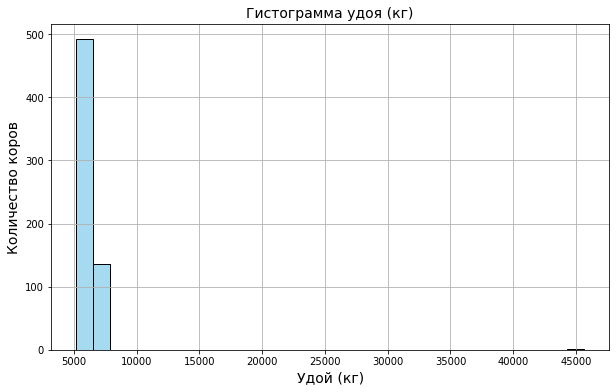

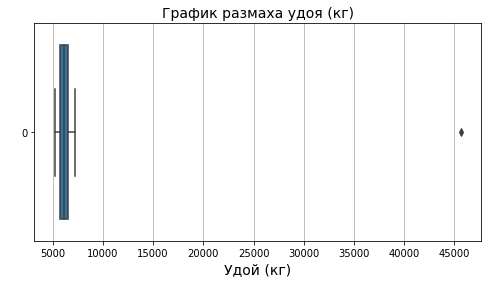

In [57]:
g_hist(df_main['удой'], 30, 'удоя (кг)', 'Удой (кг)')
g_box(df_main['удой'],'удоя (кг)', 'Удой (кг)')
plt.show()

**Видим 1 аномальное значени, выведем строку на печать**

,id,удой,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1.675,0.93,вис_бик_айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


7222.0


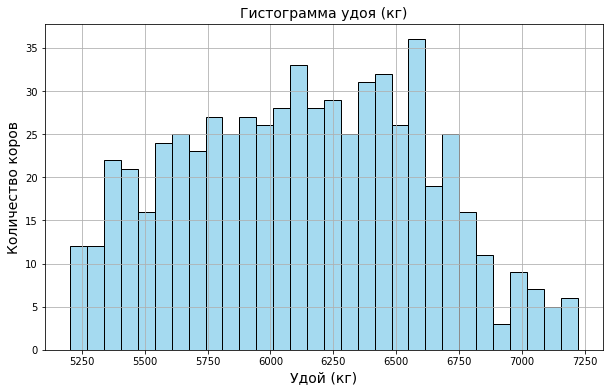

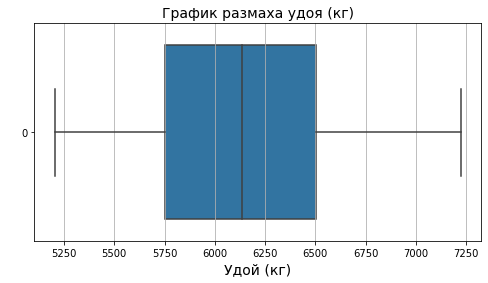

In [58]:
display(df_main[df_main['удой'] == 45616])

#на вид явная опечатка, остальные значения в строке реальные, заменим значение удоя на медианное
median_udoy = df_main['удой'].median()
df_main['удой'] = df_main['удой'].replace(45616,median_udoy)
print(df_main['удой'].max())
#теперь все чисто, снова вызовем гистограмму
g_hist(df_main['удой'], 30, 'удоя (кг)', 'Удой (кг)')
g_box(df_main['удой'],'удоя (кг)', 'Удой (кг)')
plt.show()

**Распределение стремится к нормальному. Форма распределения все еще далека от идельной формы колокола, но это можно объяснить небольшим в совокупности количеством данных (всего 600 строк).**

***ЭКЕ (Энергетическая кормовая единица)***

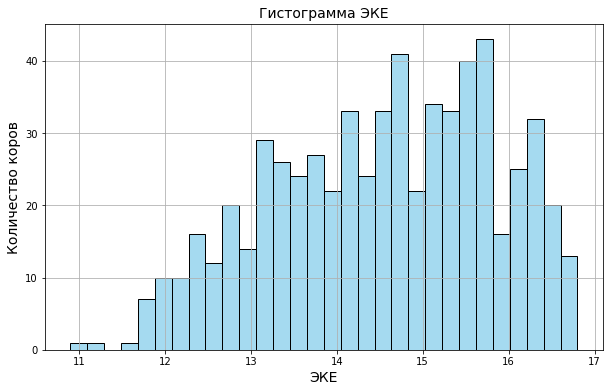

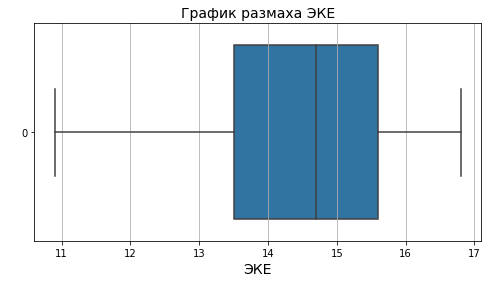

In [31]:
g_hist(df_main['эке'], 30, 'ЭКЕ', 'ЭКЕ')
g_box(df_main['эке'], 'ЭКЕ', 'ЭКЕ')
plt.show()

**Аналогичная ситуация, прослеживается стремление данных к нормализации, но до колокола далеко. Выбросов не наблюдается. Графики смещены правее среднего, что говорит о том, что данные чаще принимают значения выше среднего.**

***Сырой протеин (кг)***

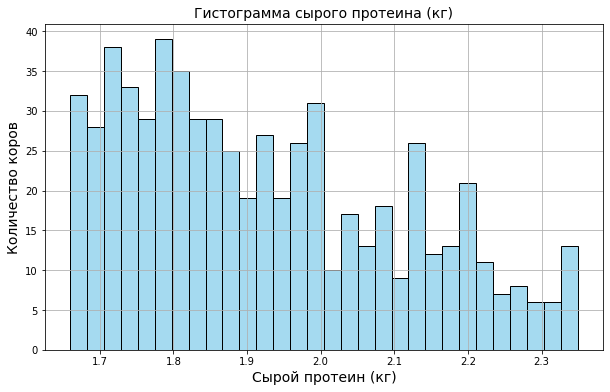

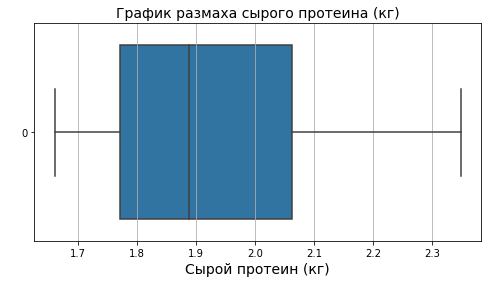

In [32]:
g_hist(df_main['сырой_протеин_кг'], 30, 'сырого протеина (кг)', 'Сырой протеин (кг)')
g_box(df_main['сырой_протеин_кг'], 'сырого протеина (кг)', 'Сырой протеин (кг)')
plt.show()

**Распределение стремится к нормальному, аномалий и выбросов нет**

***СПО (Сахаро-протеиновое соотношение)***

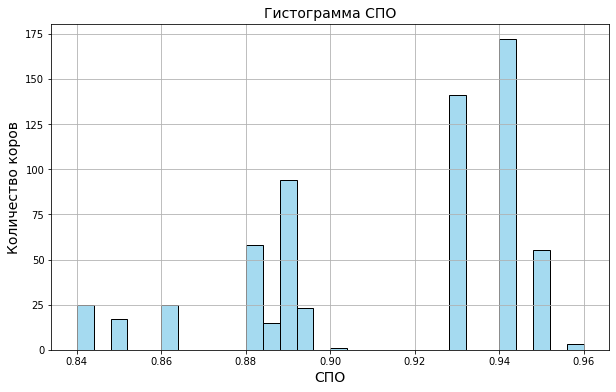

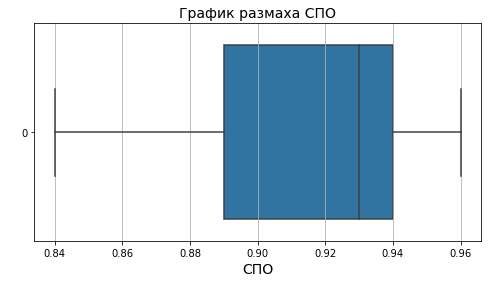

In [33]:
g_hist(df_main['спо'], 30, 'СПО', 'СПО')
g_box(df_main['спо'], 'СПО', 'СПО')
plt.show()

**Распределение необычное. Визуально график разделен на 3 кластера. Ситуацию можно объяснить разными схемами кормления коров.**

***Жирность,%***

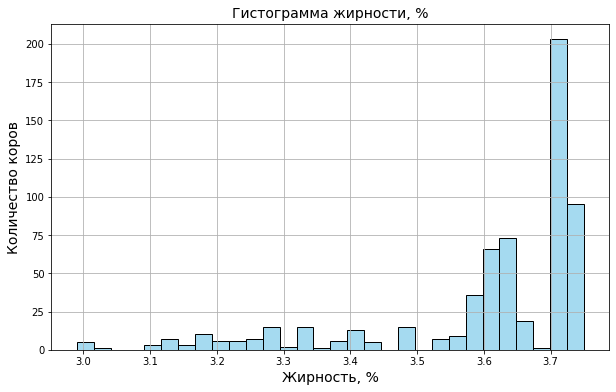

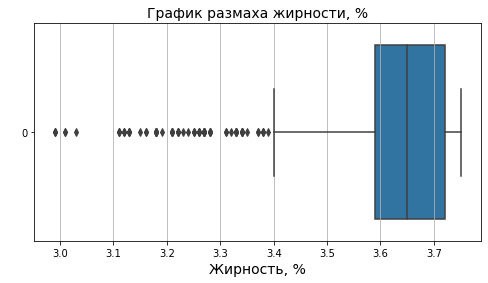

In [34]:
g_hist(df_main['жирность_%'], 30, 'жирности, %', 'Жирность, %')
g_box(df_main['жирность_%'], 'жирности, %', 'Жирность, %')
plt.show()

**В данных присутствует довольно много выбросов. Полагаю, что это объясняется тем, что в стаде присутствуют совсем молодые коровы, чьё молоко менее жирное по физиологическим причинам. Так или иначе, такая ситуация реальна и исправлений в данных не требуется.**

***Белок,%***

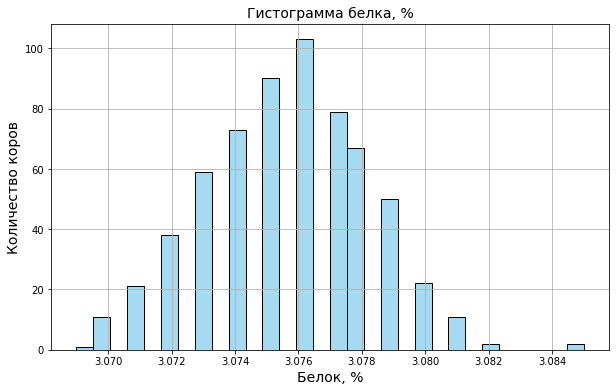

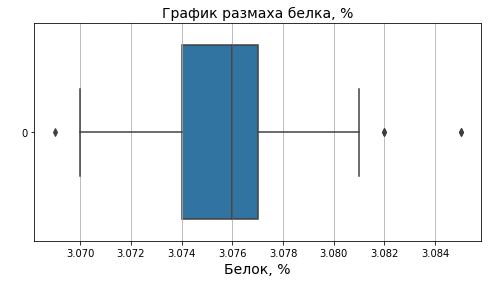

In [35]:
g_hist(df_main['белок_%'], 30, 'белка, %', 'Белок, %')
g_box(df_main['белок_%'], 'белка, %', 'Белок, %')
plt.show()

***Распределение данных нормальное. Есть незначительные выбросы, но они имеют место быть в природе.***

### Качественные показатели таблицы df_main

***Порода***

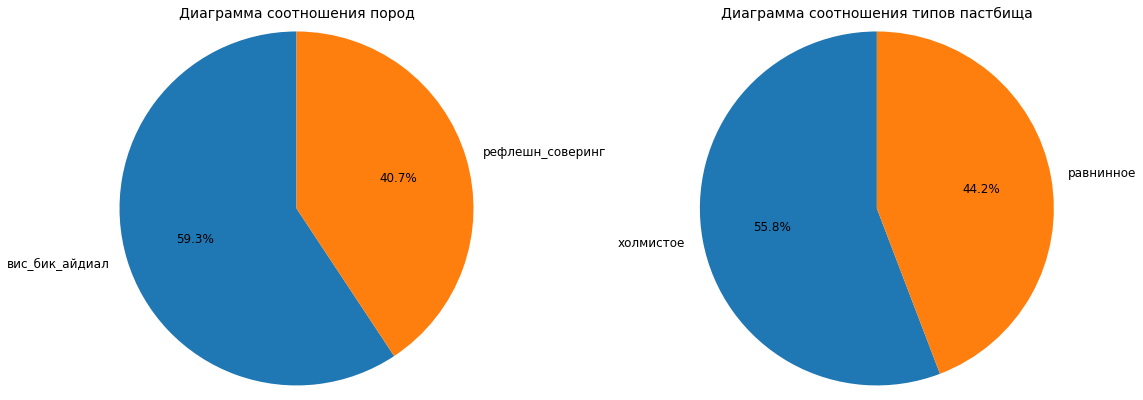

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,12))

g_pie(df_main['порода'], 'пород', axes[0], 90)
g_pie(df_main['тип_пастбища'], 'типов пастбища', axes[1], 90)

plt.tight_layout()
plt.show()

- **Пород вис бик айдиал больше на 18.6%, чем рефлешн соверинг;**
- **Холмистых типов пастбищ больше на 11.6%, чем равнинных;**

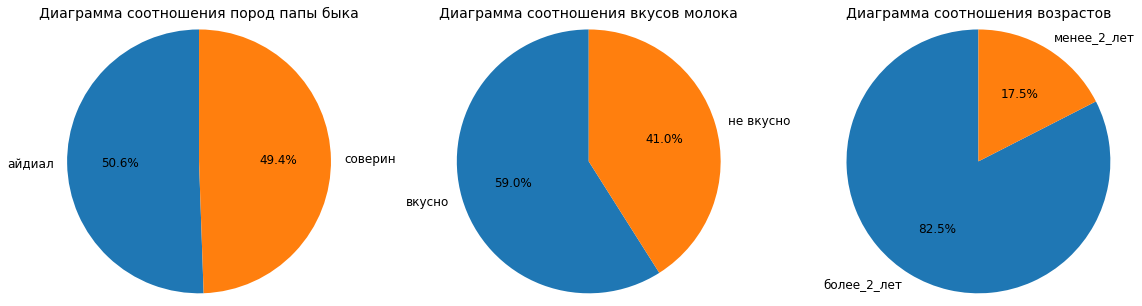

In [37]:
fig, axes = plt.subplots(1,3,figsize=(16,12))

g_pie(df_main['порода_папы_быка'], 'пород папы быка', axes[0], 90)
g_pie(df_main['вкус_молока'], 'вкусов молока', axes[1], 90)
g_pie(df_main['возраст'], 'возрастов', axes[2], 90)


plt.tight_layout()
plt.show()

- **Соотношение пород папы быка айдиал и соверин почти поровну;**
- **Вкускного молока больше на 18%, чем невкусного;**
- **82.5% коров больше двух лет, остальным меньше.**

### Показатель таблицы df_dad

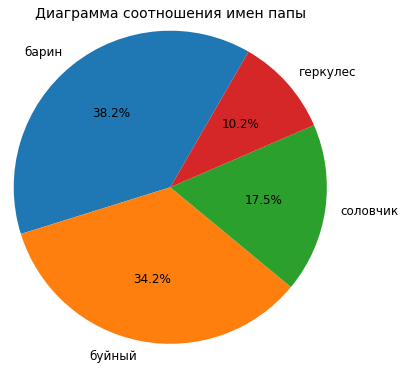

In [38]:
plt.figure(figsize=(12,6))
counts = df_dad['имя_папы'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=60, textprops={'fontsize': 12}, radius=1.2)
plt.title(f'Диаграмма соотношения имен папы', fontsize=14)
plt.show()

- **Среди имен папы доминируют Буйный и Барин; Геркулеся 17.5%, а Соловчик всего 10.2%**

### Количественные показатели таблицы df_buy

***Текущая жирность,%***

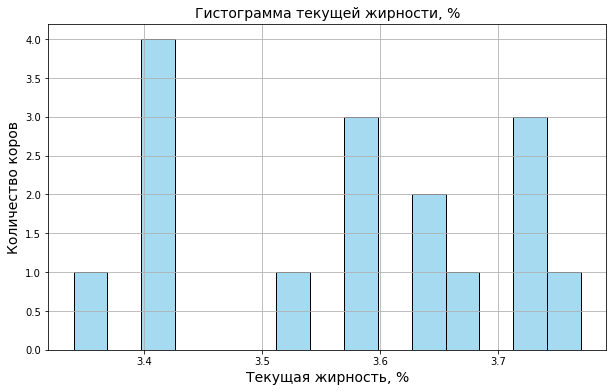

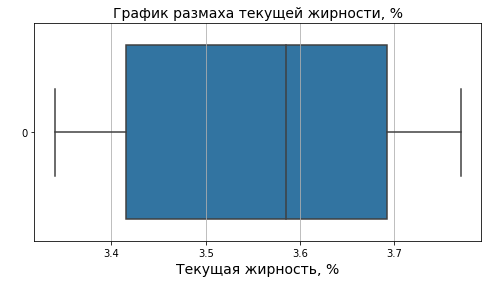

In [39]:
g_hist(df_buy['текущая_жирность_%'], 15, 'текущей жирности, %', 'Текущая жирность, %')
g_box(df_buy['текущая_жирность_%'],'текущей жирности, %', 'Текущая жирность, %')
plt.show()

**Распределение необычное, выбросов не наблюдается. Скорее всего, такое распределение вызвано малым объемом данных.**

***текущий_уровень_белка_%***

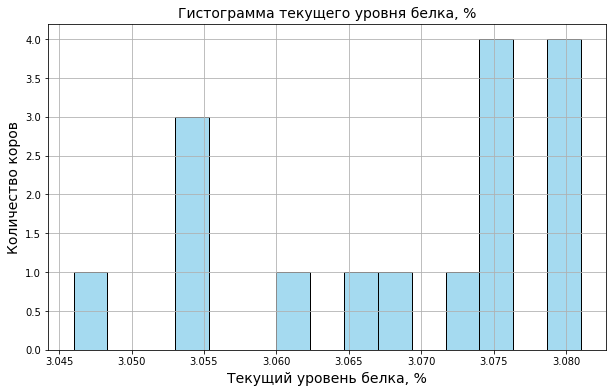

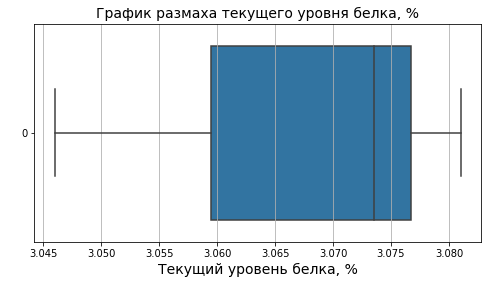

In [42]:
g_hist(df_buy['текущий_уровень_белка_%'], 15, 'текущего уровня белка, %', 'Текущий уровень белка, %')
g_box(df_buy['текущий_уровень_белка_%'],'текущего уровня белка, %', 'Текущий уровень белка, %')
plt.show()

**С белком та же картина, график размаха смещен вправо.**

### Качественные показатели таблицы df_buy

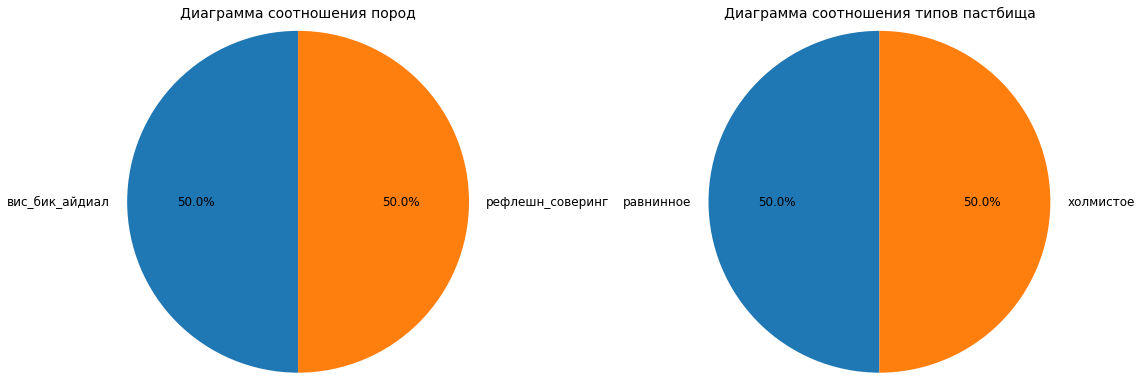

In [43]:
fig, axes = plt.subplots(1,2,figsize=(16,12))

g_pie(df_buy['порода'], 'пород', axes[0], 90)
g_pie(df_buy['тип_пастбища'], 'типов пастбища', axes[1], 90)

plt.tight_layout()
plt.show()

- **Пород в таблице поровну;**
- **Типов пастбищ тоже поровну.**

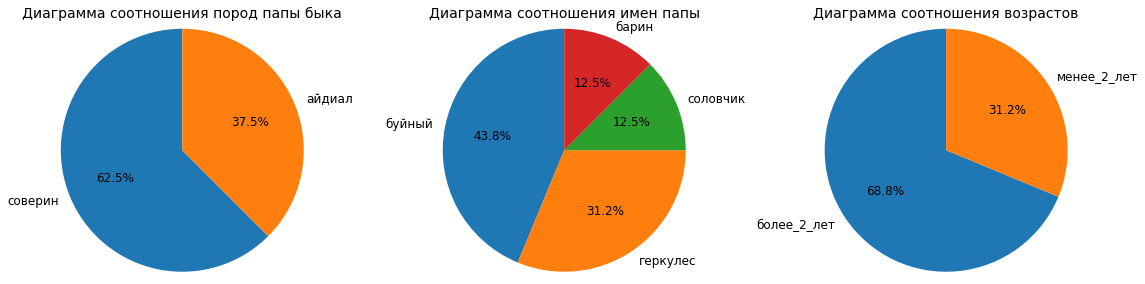

In [44]:
fig, axes = plt.subplots(1,3,figsize=(16,12))

g_pie(df_buy['порода_папы_быка'], 'пород папы быка', axes[0], 90)
g_pie(df_buy['имя_папы'], 'имен папы', axes[1], 90)
g_pie(df_buy['возраст'], 'возрастов', axes[2], 90)


plt.tight_layout()
plt.show()

- **Пород Соверин больше на 15%, чем Айдиал;**
- **Буйный встречался 43.8%, Геркулес 31.2%, Соловчик и Барин по 12.5%**
- **Коров старше двух лет 68.8%, а младше 31.2%**

### Итоги раздела:

- В основном, распределение данных принимает форму нормального, за исключением: СПО (Кластеризация), Текущая жирность % и Текущий уровень белка% (слишком мало наблюдений в таблице df_buy);
- В ходе анализа было обнаружено еще несколько опечаток, которые были устранены в коде;
- Выбросы мы наблюдаем в столбцах белок% и жирность% из таблицы df_main, но ситуация похожа на реальную;
- В целом, часть качественных данных уже можно было бы заменить на булевые, а множественные оставить для кодирования в линейной модели. Так можно было бы прикинуть корреляцию почти всех признаков в следующем разделе;
- В таблице df_main теперь строк столько же, сколько и в df_dad. Объединение должно будет пройти нормально, но лучше проверить.
- По всем категориям хватает наблюдений, чтобы использовать их для построения моделей. Признаки, в основном, сбалансированы.

## Корреляционный анализ

### Изучим взаимосвязь: рассчитаем коэффициенты корреляции между всеми признаками.

*Выводы о силе зависимости будут производиться по шкале Phi-k:*
- 0.00 - 0.10: очень слабая зависимость
- 0.10 - 0.30: слабая зависимость
- 0.30 - 0.50: умеренная зависимость
- 0.50 - 0.70: заметная зависимость
- 0.70 - 0.90: высокая зависимость
- 0.90 - 1.00: очень высокая зависимость

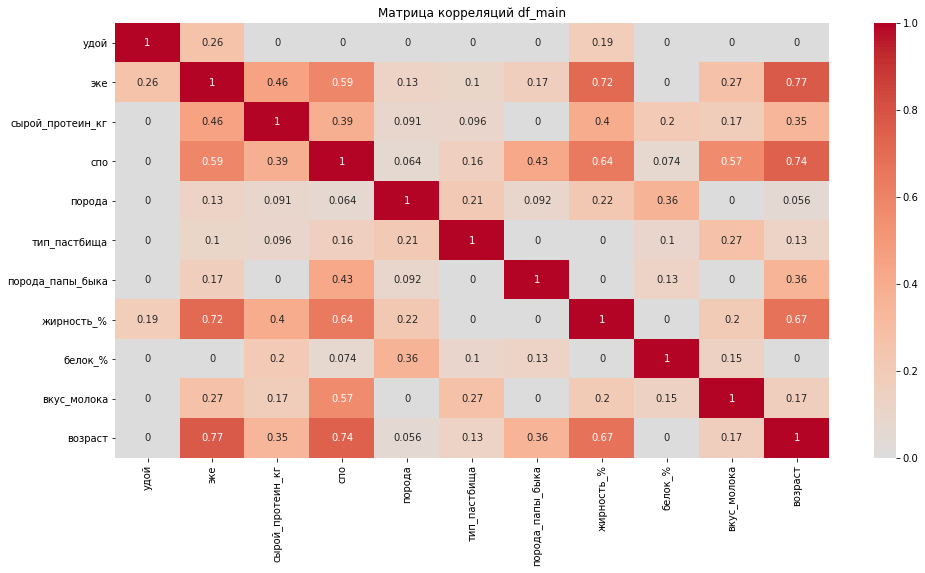

In [54]:
matrix_main_df = df_main.drop('id', axis=1).copy()
matrix_corr_main = matrix_main_df.phik_matrix(interval_cols=['удой', 
                                                             'эке', 
                                                             'сырой_протеин_кг', 
                                                             'спо', 
                                                             'жирность_%', 
                                                             'белок_%'])

plt.figure(figsize=(16,8))
sns.heatmap(matrix_corr_main, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций df_main')
plt.show()

**В таблице df_main наблюдаем:**

**Высокая зависимость:**

- ЭКЕ и Возраст (0.77)
- СПО и Возраст (0.74)
- ЭКЕ и Жирность_% (0.72)

**Заметная зависимость:**

- Жирность_% и Возраст (0.67)
- СПО и Жирность_% (0.64)
- ЭКЕ и СПО (0.59)
- СПО и Вкус_молока (0.57)

**Умеренная зависимость:**

- ЭКЕ и Сырой_протеин_кг (0.46)
- СПО и Порода_папы_быка (0.43)
- Сырой_протеин_кг и Жирность_% (0.4)
- Сырой_протеин_кг и СПО (0.39)
- Порода и Белок_% (0.36)
- Порода_папы_быка и Возраст (0.36)
- Сырой_протеин_кг и Возраст (0.35)

**Слабая зависимость:**

- ЭКЕ и Вкус_молока (0.27)
- Тип_пастбища и Вкус_молока (0.27)
- Сырой_протеин_кг и Вкус_молока (0.27)
- Удой и ЭКЕ (0.26)
- Порода и Жирность_% (0.22)
- Порода и Тип_пастбища (0.21)
- Сырой_протеин_кг и Белок_% (0.2)
- Жирность_% и Вкус_молока (0.2)
- Удой и Жирность_% (0.19)
- ЭКЕ и Порода_папы_быка (0.17)
- Вкус_молока и Возраст (0.17)
- СПО и Тип_пастбища (0.16)
- Белок и Вкус_молока (0.15)
- ЭКЕ и Порода (0.13)
- Тип_пастбища и Возраст (0.13)
- Порода_папы_быка и Белок_% (0.13)
- ЭКЕ и Тип_пастбища (0.1)
- Тип_пастбища и Белок_% (0.1)

*Другие зависимости ниже слабой не имеют для нас исследовательского значения*

*Еще интересно, что обратной зависимости между показателями тоже нет нигде. Только однонаправленная.*

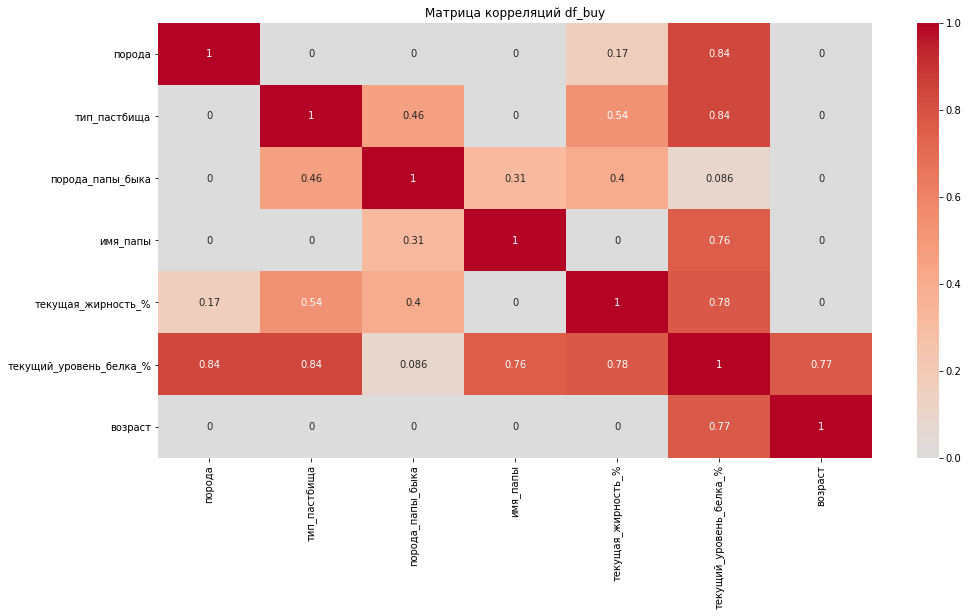

In [55]:
matrix_corr_buy = df_buy.phik_matrix(interval_cols=['текущая_жирность_%', 'текущий_белок_%'])

plt.figure(figsize=(16,8))
sns.heatmap(matrix_corr_buy, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций df_buy')
plt.show()

**В таблице df_buy наблюдаем:**

**Высокая зависимость:**

- Порода и Текущий_уровень_белка_% (0.84)
- Тип_пастбища и Текущий_уровень_белка_% (0.84)
- Текущая_жирность_% и Текущий_уровень_белка_% (0.78)
- Текущий_уровень_белка_% и Возраст (0.77)
- Имя_папы и Текущий_уровень_белка_% (0.76)

**Заметная зависимость:**

- Тип_пастбища и Текущая_жирность_% (0.54)

**Умеренная зависимость:**

- Тип_пастбища и Порода_папы_быка (0.46)
- Порода_папы_быка и Текущая_жирность_% (0.4)
- Порода_папы_быка и Имя_папы (0.31)

**Слабая зависимость:**

- Порода и Текущая_жирность_% (0.17)


*Другие зависимости ниже слабой не имеют для нас исследовательского значения.*

*Обратной зависимости между показателями тоже нет нигде. Только однонаправленная.*

*Такая картина зависимостей может быть недостоверной ввиду малого количества наблюдений.*

### Посторим диагарммы рассеяния Удой (кг) и всех количественных признаков с учётом значения категориальных признаков.

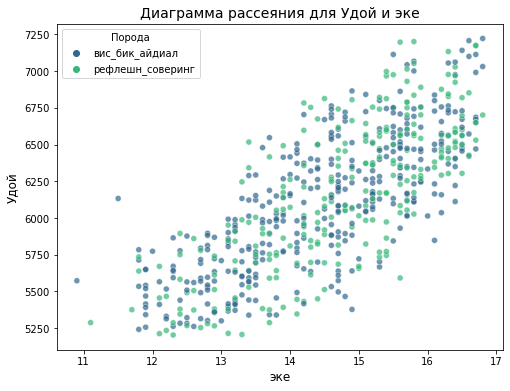

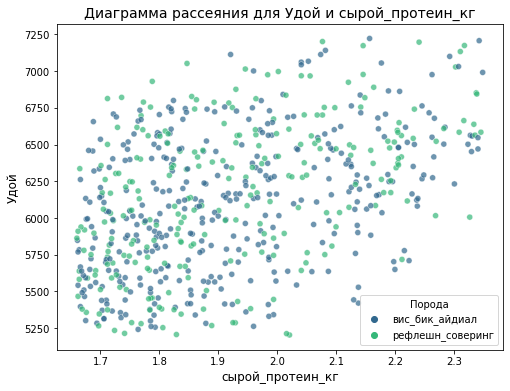

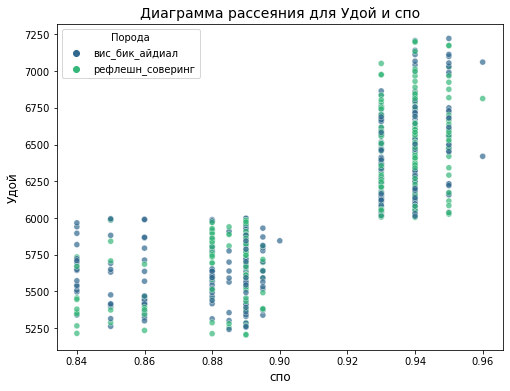

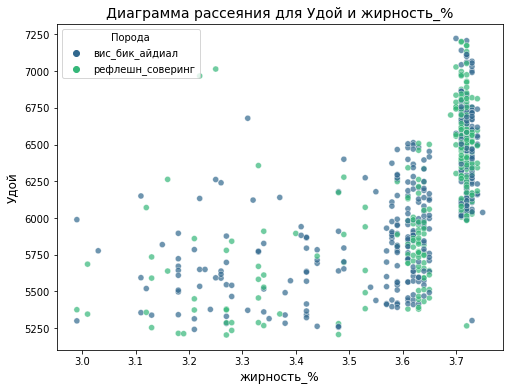

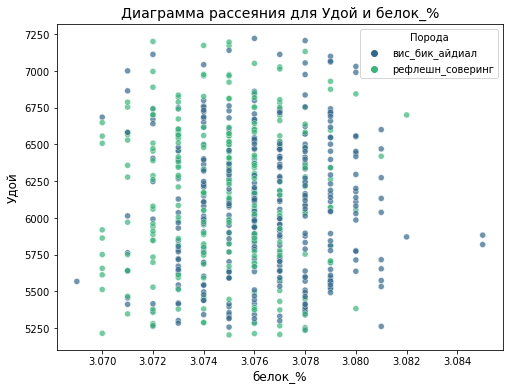

In [59]:
quantitative_features = ['эке', 'сырой_протеин_кг', 'спо', 'жирность_%', 'белок_%']

for feature in quantitative_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_main, x=feature, y='удой', hue='порода', palette='viridis', alpha=0.7)
    plt.title(f'Диаграмма рассеяния для Удой и {feature}', fontsize = 14)
    plt.xlabel(feature, fontsize = 12)
    plt.ylabel('Удой', fontsize = 12)
    plt.legend(title='Порода', fontsize = 10)
    plt.show()

1. Удой, ЭКЕ и Порода. 

Высокая сонаправленная зависимость. Визуально между линейной и квадратической (график слегка напоминает пораболу). Для обеих пород визуально одинаковая.

2. Удой, Сырой протеин и Порода. 

Умеренная сонаправленная зависимость. Визуально для обеих пород тенденция одинакова.

3. Удой, СПО, Порода. 

Высокая нелинейная зависимость. Итоговые показатели делятся на 2 кластера.

4. Удой, Жирность,% и Порода. 

Заметная сонаправленная зависимость, основная масса группируется на значениях 3.6% и 3.7%. Полагаю, это типичная жирность для этих пород.

5. Удой, Белок,% и Порода. Зависимости нет. 

Складывается впечатление, что у породы вис бик айдиал белок в % выше, чем у рефлешн_соверинг.

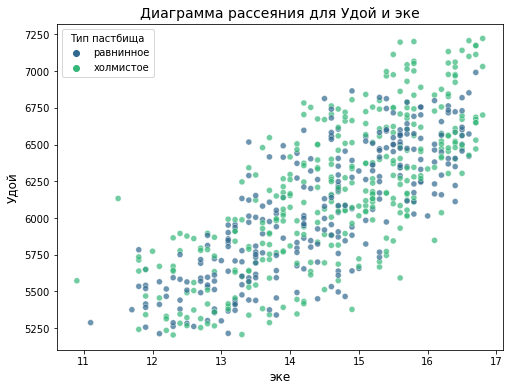

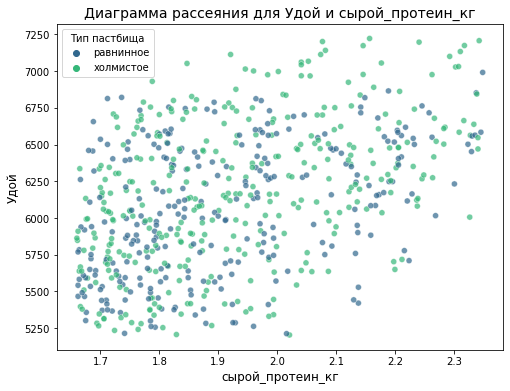

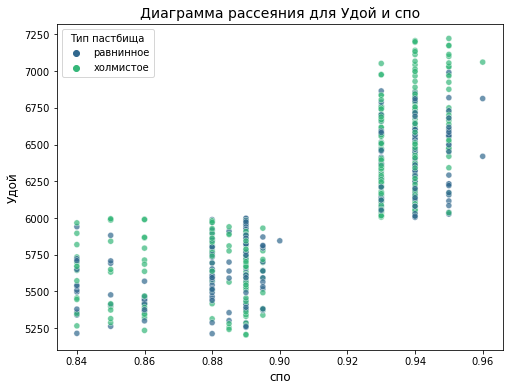

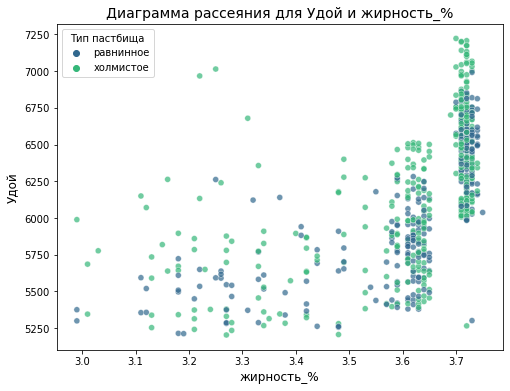

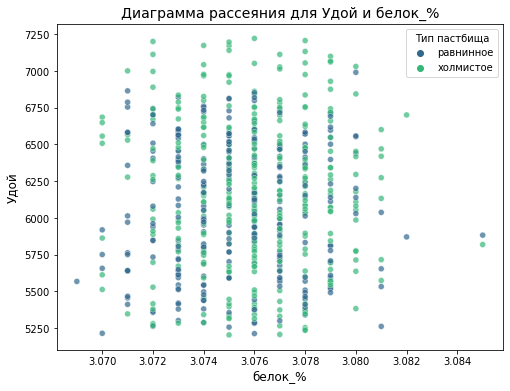

In [60]:
for feature in quantitative_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_main, x=feature, y='удой', hue='тип_пастбища', palette='viridis', alpha=0.7)
    plt.title(f'Диаграмма рассеяния для Удой и {feature}', fontsize = 14)
    plt.xlabel(feature, fontsize = 12)
    plt.ylabel('Удой', fontsize = 12)
    plt.legend(title='Тип пастбища', fontsize = 10)
    plt.show()

1. Удой, ЭКЕ и Тип пастбища. 

Высокая сонаправленная зависимость. Визуально между линейной и квадратической (график слегка напоминает пораболу). Для обоих типов пастбища визуально одинаковая, на пиках с холмистого удой больше.

2. Удой, Сырой протеин и Тип пастбища. 

Умеренная сонаправленная зависимость. Визуально для обеих пород тенденция одинакова.

3. Удой, СПО, Тип пастбища. 

Высокая нелинейная зависимость. Итоговые показатели делятся на 2 кластера. При Удоях выше 6000кг СПО (Сахаро-протеиновое соотношение) на своих пиках для обоих типов пастбища.

4. Удой, Жирность,% и Тип пастбища. 

Заметная сонаправленная зависимость, основная масса группируется на значениях 3.6% и 3.7%. Полагаю, это типичная жирность для этих пород.

5. Удой, Белок,% и Тип пастбища. 

Линейная зависимость не прослеживается.

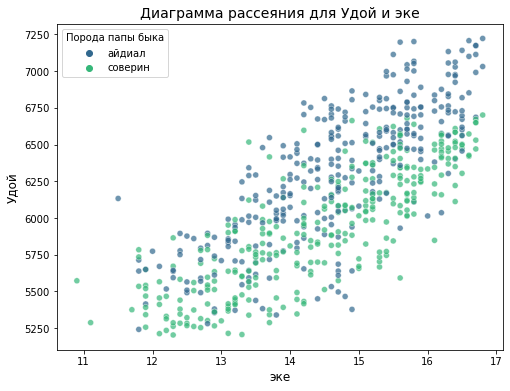

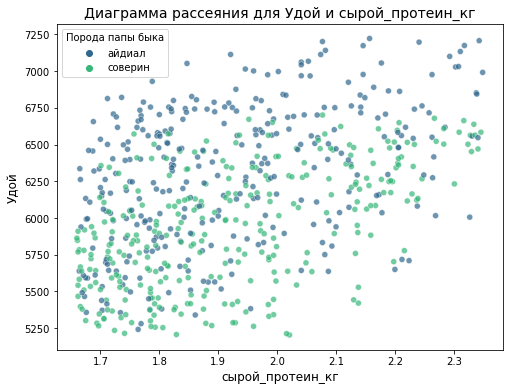

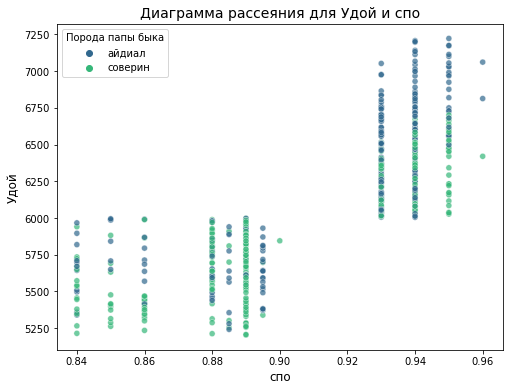

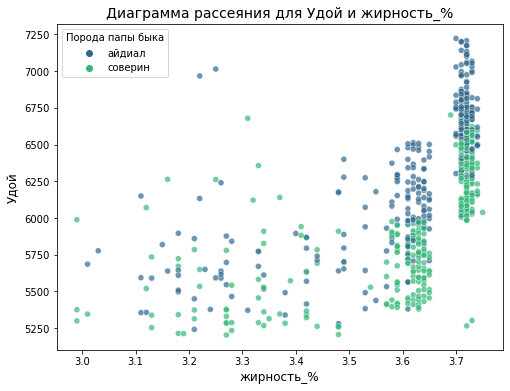

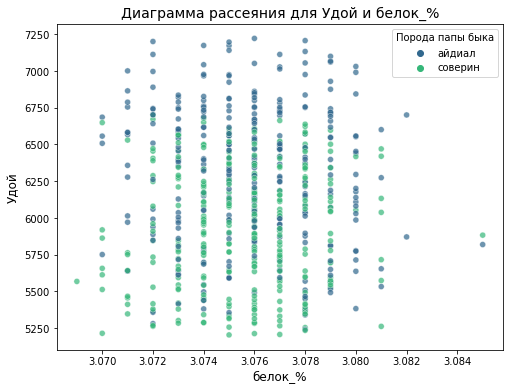

In [61]:
for feature in quantitative_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_main, x=feature, y='удой', hue='порода_папы_быка', palette='viridis', alpha=0.7)
    plt.title(f'Диаграмма рассеяния для Удой и {feature}', fontsize = 14)
    plt.xlabel(feature, fontsize = 12)
    plt.ylabel('Удой', fontsize = 12)
    plt.legend(title='Порода папы быка', fontsize = 10)
    plt.show()

1. Удой, ЭКЕ и Порода папы быка. 

Высокая сонаправленная зависимость. Визуально между линейной и квадратической (график слегка напоминает пораболу). Для обоих типов пастбища визуально одинаковая, на пиках с холмистого удой больше.

2. Удой, Сырой протеин и Порода папы быка. 

Умеренная сонаправленная зависимость. Визуально для обеих пород тенденция одинакова.

3. Удой, СПО, Порода папы быка. 

Высокая нелинейная зависимость. Итоговые показатели делятся на 2 кластера. При Удоях выше 6000кг СПО (Сахаро-протеиновое соотношение) на своих пиках для обоих типов пастбища.

4. Удой, Жирность,% и Порода папы быка. 

Заметная сонаправленная зависимость, основная масса группируется на значениях 3.6% и 3.7%. Полагаю, это типичная жирность для этих пород.

5. Удой, Белок,% и Порода папы быка. 

Линейная зависимость не прослеживается.

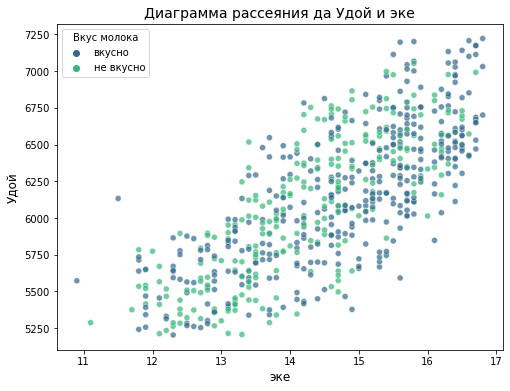

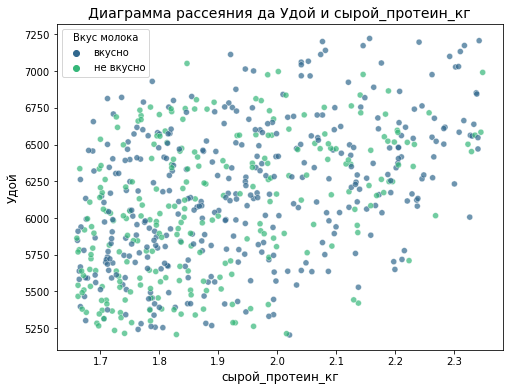

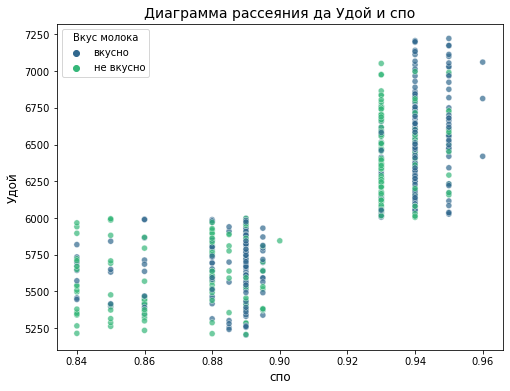

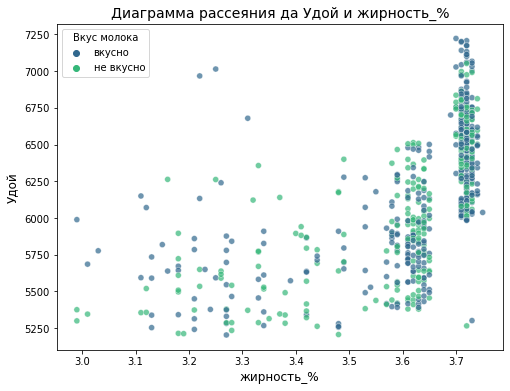

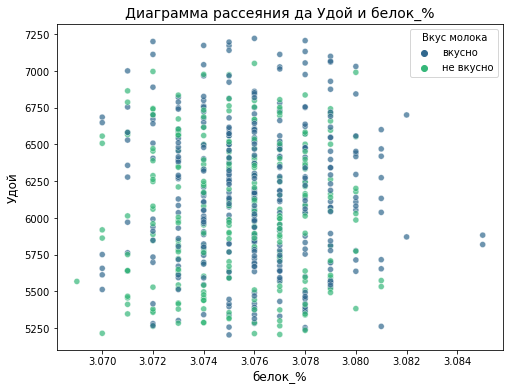

In [62]:
for feature in quantitative_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_main, x=feature, y='удой', hue='вкус_молока', palette='viridis', alpha=0.7)
    plt.title(f'Диаграмма рассеяния да Удой и {feature}', fontsize = 14)
    plt.xlabel(feature, fontsize = 12)
    plt.ylabel('Удой', fontsize = 12)
    plt.legend(title='Вкус молока', fontsize = 10)
    plt.show()

1. Удой, ЭКЕ и Вкус молока. 

Высокая сонаправленная зависимость. Визуально между линейной и квадратической (график слегка напоминает пораболу). Для обоих вкусов молока. У вкусного молока ЭКЕ немного выше.

2. Удой, Сырой протеин и Вкус молока. 

Умеренная сонаправленная зависимость. Визуально для обоих вкусов тенденция одинакова.

3. Удой, СПО, Вкус молока. 

Высокая нелинейная зависимость. Итоговые показатели делятся на 2 кластера. При Удоях выше 6000кг СПО (Сахаро-протеиновое соотношение) на своих пиках для обоих вкусов. У вкусного молока СПО 0.94-0.96, у невкусного, в основном, 0.93 максимум.

4. Удой, Жирность,% и Вкус молока. 

Заметная сонаправленная зависимость, основная масса группируется на значениях 3.6% и 3.7% жирности. Полагаю, это типичная жирность для этих пород.

5. Удой, Белок,% и Вкус молока. 

Линейная зависимость не прослеживается. У вкусного молока белковая составляющая чуть выше.

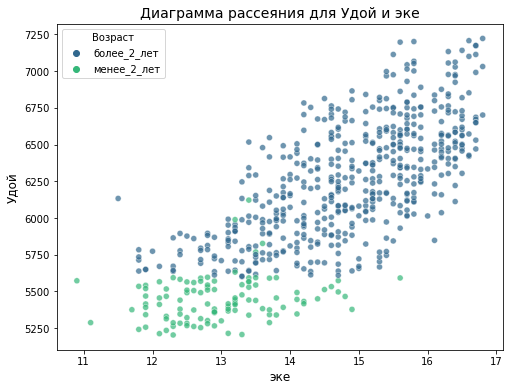

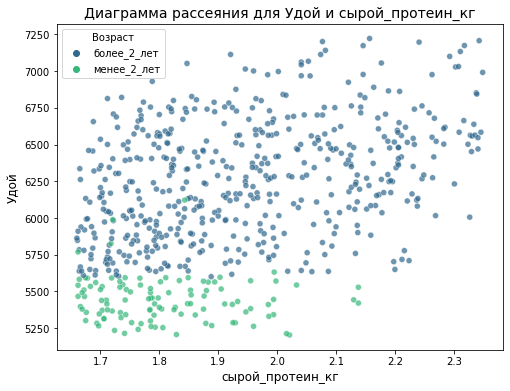

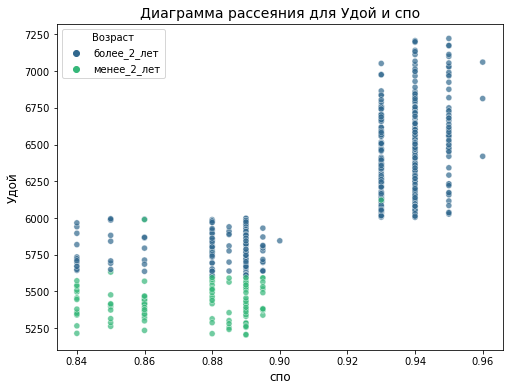

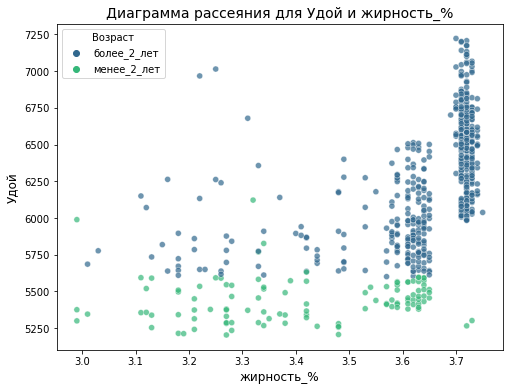

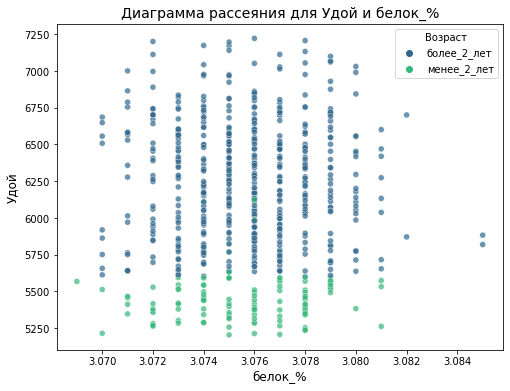

In [63]:
for feature in quantitative_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_main, x=feature, y='удой', hue='возраст', palette='viridis', alpha=0.7)
    plt.title(f'Диаграмма рассеяния для Удой и {feature}', fontsize = 14)
    plt.xlabel(feature, fontsize = 12)
    plt.ylabel('Удой', fontsize = 12)
    plt.legend(title='Возраст', fontsize = 10)
    plt.show()

1. Удой, ЭКЕ и Возраст коровы. 

Высокая сонаправленная зависимость. Визуально между линейной и квадратической (график слегка напоминает пораболу). У коров старше 2 лет удой гораздо больше.

2. Удой, Сырой протеин и Возраст коровы. 

Умеренная сонаправленная зависимость. У коров старше 2 лет сырой протеин выше.

3. Удой, СПО, Возраст коровы. 

Высокая нелинейная зависимость. Итоговые показатели делятся на 2 кластера. У коров старше 2 лет СПО выше.

4. Удой, Жирность,% и Возраст коровы. 

Заметная сонаправленная зависимость, . У коров старше 2 лет жирность выше и в основном равняется 3.6% и 3.7%.

5. Удой, Белок,% и Возраст коровы. 

Линейная зависимость не прослеживается. По белку,% ситуация похожая для обеих возрастных групп.

### Проверка на мультиколлинеарность входных признаков

Коэффициент **VIF (Variance Inflation Factor):** VIF показывает, насколько сильно признак линейно зависит от других признаков. VIF больше 5 (или 10) часто указывает на потенциальную мультиколлинеарность.

In [74]:
vif_data = df_main.select_dtypes(include=['int', bool, 'float'])
vif_data = vif_data.assign(const=1)
# Вычисляем VIF для каждого признака
vif = pd.DataFrame()
vif['Входной признак'] = quantitative_features
vif['Показатель VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]
vif = vif.sort_values(by='Показатель VIF', ascending=False)

display(vif)

,Входной признак,Показатель VIF
1,сырой_протеин_кг,3.560993
4,белок_%,3.505202
2,спо,2.931150
3,жирность_%,1.375510
0,эке,1.016592


**Согласно расчетам коэффициентов VIF видим, что мультиколлинеарность признаков отсутствует.** 

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = df_main.select_dtypes(include=['int', bool, 'float'])
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': quantitative_features,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]})
display(vif)


### Итоги раздела:

1. **Зависимость между Удоем и входными признаками:**
- Сонаправленная зависимость между Удой и ЭКЕ. Выглядит скорее как квадратичная, чем линейная. Далее добавим признак эке_квадрат, чтобы решить данную проблему при моделировании.
- Сонаправленная между Удой и Жирность,%
- С остальными количественными признаками линейной взаимосвязи нет

2. **Заметнее всего выделяется категория возраста коровы, породы папы быка и типа пастбища - они напрямую влияют на увеличение объема удоя у коров. Больше всех молока дают коровы *Старше двух лет*, у которых *папа породы Айдиал* и которые пасутся на *Холмистых пастбищах*!**


3. **Мультиколлинеарность признаков отсутствует**


4. **На данном этапе признаки удалять не стану. Все признаки валидны и хорошо себя показывают.**

## Обучение модели линейной регрессии

### Построим модель линейной регрессии №1

In [76]:
#Функция для построения графиков
def mo_graph(predictions, residuals):
    axes[0].hist(x=residuals, bins=10, color='skyblue', ec='black')
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    scatter = axes[1].scatter(x=predictions, y=residuals, c=residuals, cmap='viridis', edgecolor='k')
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')

    cbar = fig.colorbar(scatter, ax=axes[1])
    cbar.set_label('Значения остатков')

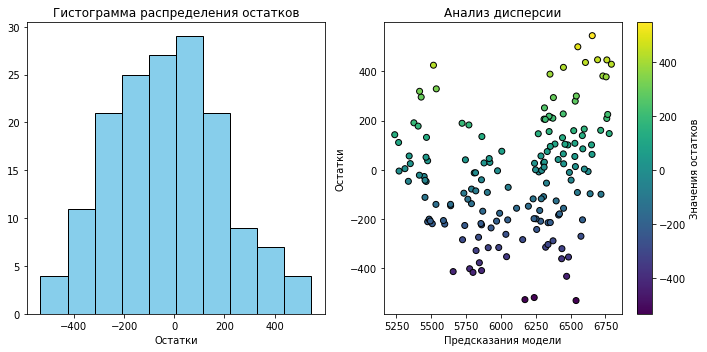

Значение R² для линейной регрессии 0.81


In [78]:
df_main_model_1 = df_main.copy()

#жирность_% и белок_% убираем, поскольку это признаки молока, а не удоя
X_1 = df_main_model_1.drop(['id','удой', 'белок_%', 'жирность_%', 'вкус_молока'], axis=1)
y_1 = df_main_model_1['удой']

#Разделяем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,
                                                           y_1,
                                                           random_state=RANDOM_STATE)

#Далее кодирую категориальные и масштабирую количественные входные признаки
cat_names = ['тип_пастбища','порода_папы_быка', 'возраст','порода']
col_names = ['эке','спо','сырой_протеин_кг']

encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

X_1_train_scaled = scaler.fit_transform(X_1_train[col_names])
X_1_test_scaled = scaler.fit_transform(X_1_test[col_names])

X_1_train_ohe = encoder.fit_transform(X_1_train[cat_names])
X_1_test_ohe = encoder.fit_transform(X_1_test[cat_names])

#Объединяю тренировочную и тестовую выборки
X_1_train_scaled = pd.DataFrame(X_1_train_scaled, columns=[col_names])
X_1_test_scaled = pd.DataFrame(X_1_test_scaled, columns=[col_names])

X_1_train_ohe = pd.DataFrame(X_1_train_ohe, columns=[cat_names])
X_1_test_ohe = pd.DataFrame(X_1_test_ohe, columns=[cat_names])

X_1_train = pd.concat([X_1_train_scaled, X_1_train_ohe], axis=1)
X_1_test = pd.concat([X_1_test_scaled, X_1_test_ohe], axis=1)

#Приступим к обучению модели

model_lr_1 = LinearRegression()
model_lr_1.fit(X_1_train, y_1_train)
predictions_1 = model_lr_1.predict(X_1_test)

#Считаем остатки и проводим анализ модели

residuals_1 = y_1_test - predictions_1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

mo_graph(predictions_1, residuals_1)

plt.tight_layout()
plt.show()

r2_first = r2_score(y_1_test, predictions_1)
print(f'Значение R² для линейной регрессии {r2_first.round(3)}')

- **Метрика R2=0.81 говорит о том, что модель объясняет 81% дисперсии целевой переменной, что является довольно высоким показателем. Это означает, что модель хорошо справляется с прогнозом и учитывает большую часть изменчивости данных.** 
- **Распределение выглядит нормальным. График чуть смещен левее середины = модель чуть лучше предсказывает меньшие удои**
- **Диаграмма рассеяние похожа на дугу. Говорит нам о нелинейсности остатков. Модель получается довольно непредсказуемой и ненадежной**

Попробуем изменить признаки и улучшить нашу модель.

### Проводим фиксы признаков СПО и ЭКЕ, строим модель линейной регрессии №2

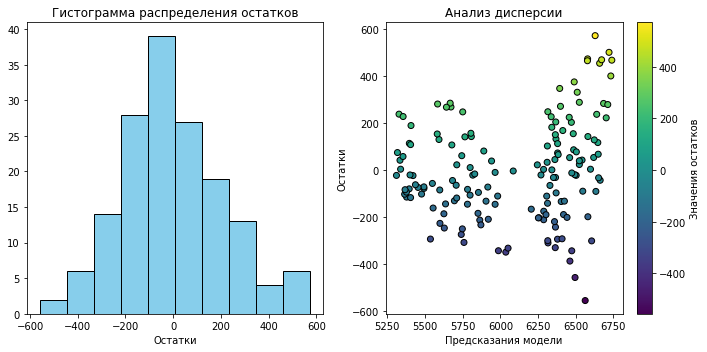

Значение R² для линейной регрессии 0.839


In [80]:
df_main_model_2 = df_main.copy()

#Фиксим входные признаки
df_main_model_2['спо'] = (df_main_model_2['спо'] > 0.92).astype(int) #СПО сделали категориальным в соответствии с гарницей 
#между кластерами распределения значений
df_main_model_2['эке_квадрат'] = df_main_model_2['эке']**2 #ЭКЕ пробуем возвести в квадрат по заданию

X_2 = df_main_model_2.drop(['id','удой', 'белок_%', 'жирность_%','вкус_молока', 'эке'], axis=1)
y_2 = df_main_model_2['удой']

RANDOM_STATE = 42

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,
                                                           y_2,
                                                           random_state=RANDOM_STATE)

#Далее кодирую категориальные и масштабирую количественные входные признаки
cat_names_2 = ['тип_пастбища','порода_папы_быка', 'возраст','порода','спо']
col_names_2 = ['эке_квадрат','сырой_протеин_кг']

X_2_train_scaled = scaler.fit_transform(X_2_train[col_names_2])
X_2_test_scaled = scaler.fit_transform(X_2_test[col_names_2])

X_2_train_ohe = encoder.fit_transform(X_2_train[cat_names_2])
X_2_test_ohe = encoder.fit_transform(X_2_test[cat_names_2])

#Объединяю тренировочную и тестовую выборки
X_2_train_scaled = pd.DataFrame(X_2_train_scaled, columns=col_names_2)
X_2_test_scaled = pd.DataFrame(X_2_test_scaled, columns=col_names_2)

X_2_train_ohe = pd.DataFrame(X_2_train_ohe, columns=cat_names_2)
X_2_test_ohe = pd.DataFrame(X_2_test_ohe, columns=cat_names_2)

X_2_train = pd.concat([X_2_train_scaled, X_2_train_ohe], axis=1)
X_2_test = pd.concat([X_2_test_scaled, X_2_test_ohe], axis=1)

#Приступим к обучению модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_2_train, y_2_train)
predictions_2 = model_lr_2.predict(X_2_test)


#Считаем остатки и проводим анализ модели
residuals_2 = y_2_test - predictions_2

fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(10,5))

mo_graph(predictions_2, residuals_2)

plt.tight_layout()
plt.show()

r2_second = r2_score(y_2_test, predictions_2)
print(f'Значение R² для линейной регрессии {r2_second.round(3)}')

- **Метрика R2=0.839 говорит о том, что модель объясняет 84% дисперсии целевой переменной, что является довольно высоким показателем. Это означает, что модель хорошо справляется с прогнозом и учитывает большую часть изменчивости данных еще лучше, чем Модель №1.**
- **Распределение нормальное. Появился малый горб на отрезке остатков 400-600. Модель все еще можно улучшить!**
- **Диаграмма рассеяния более однородная, но все еще нелинейная. Теперь похожа на рупор. Модель плохо предсказывает высокие показатели удоя**

Попробуем еще изменить признаки и улучшить нашу модель.

### Соединяем таблицы df_main и df_dad, строим модель линейной регрессии №3

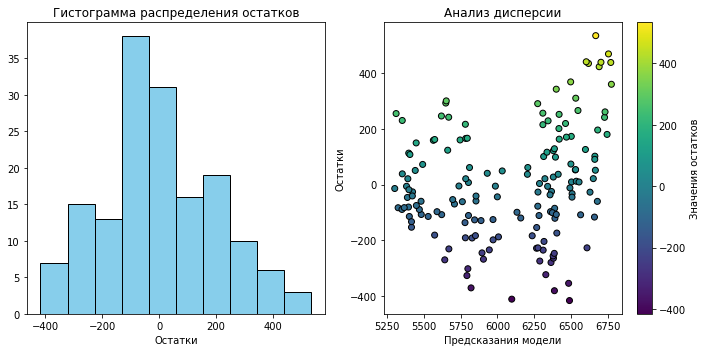

Значение R² для линейной регрессии 0.859


In [83]:
#Добавили признак в таблицу
df_1 = df_main.copy()
df_2 = df_dad.copy()
df_new = df_1.merge(df_2, how='left')
df_new['спо'] = (df_new['спо'] > 0.92).astype(int)
df_new['эке_квадрат'] = df_new['эке']**2

#Решил все же добавить сырой_протеин_кг в этот просчет и не ошибся
X_3 = df_new.drop(['id','удой', 'белок_%', 'жирность_%','вкус_молока', 'эке'], axis=1)
y_3 = df_new['удой']


RANDOM_STATE = 42
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3,
                                                           y_3,
                                                           random_state=RANDOM_STATE)

cat_names_3 = ['тип_пастбища','порода_папы_быка', 'возраст','порода','спо','имя_папы']
col_names_3 = ['эке_квадрат','сырой_протеин_кг']

#scaler_2 = PCA(n_components = 5) пробовал этот scaler, но успешно модели максимум была 69% и 
#ошибалась она очень много в средних значениях, зато меньше в крайних

X_3_train_scaled = scaler.fit_transform(X_3_train[col_names_3])
X_3_test_scaled = scaler.fit_transform(X_3_test[col_names_3])

X_3_train_ohe = encoder.fit_transform(X_3_train[cat_names_3])
X_3_test_ohe = encoder.fit_transform(X_3_test[cat_names_3])

X_3_train_scaled = pd.DataFrame(X_3_train_scaled, columns=col_names_3)
X_3_test_scaled = pd.DataFrame(X_3_test_scaled, columns=col_names_3)

X_3_train_ohe = pd.DataFrame(X_3_train_ohe, columns=encoder.get_feature_names_out(cat_names_3))
X_3_test_ohe = pd.DataFrame(X_3_test_ohe, columns=encoder.get_feature_names_out(cat_names_3))

X_3_train = pd.concat([X_3_train_scaled, X_3_train_ohe], axis=1)
X_3_test = pd.concat([X_3_test_scaled, X_3_test_ohe], axis=1)

model_lr_3 = LinearRegression()
model_lr_3.fit(X_3_train, y_3_train)
predictions_3 = model_lr_3.predict(X_3_test)

residuals_3 = y_3_test - predictions_3

fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(10,5))

mo_graph(predictions_3, residuals_3)

plt.tight_layout()
plt.show()

r2_third = r2_score(y_3_test, predictions_3)
print(f'Значение R² для линейной регрессии {r2_third.round(3)}')

- **R2=0.859 модель линейной регрессии стала еще точнее объяснять дисперсию целевого признака ~85.9% случаев.(ещелучше)** 
- **Распределение остатков нормальное, но смещается чуть левее. Значит, что модель слегка недооценивает значение предсказаний, особенно для наблюдений с более высокими значениями целевой переменной.**
- **Диаграмма рассеяния более сгруппированна справа, но менее слева. Довольно близка к линейной. Модель все же хуже предсказывает низкие и высокие значения Удоя.**
- **Чтобы еще больше минимизировать разброс дисперсии остатков - нужно дальше избавляться от нелинейности, либо добавлять какие-то новые признаки**
- **В целом, я бы выбрал модель №3, она более сглаженно предсказывает показатели удоя, ошибки распределяются более равномерно.**

### Оценка качества полученных моделей

In [84]:
mae_1 = mean_absolute_error(predictions_1,y_1_test)
mse_1 = mean_squared_error(predictions_1,y_1_test)
r2_first

mae_2 = mean_absolute_error(predictions_2,y_2_test)
mse_2 = mean_squared_error(predictions_2,y_2_test)
r2_second

mae_3 = mean_absolute_error(predictions_3,y_3_test)
mse_3 = mean_squared_error(predictions_3,y_3_test)
r2_third

success_rates = pd.DataFrame()
success_rates['model_name'] = ['model_1','model_2','model_3']
success_rates['mae'] = [mae_1,mae_2,mae_3]
success_rates['mse'] = [mse_1,mse_2,mse_3]
success_rates['R2'] = [r2_first,r2_second,r2_third]

display(success_rates.round(3))

,model_name,mae,mse,R2
0,model_1,184.217,52195.173,0.810
1,model_2,167.185,44146.204,0.839
2,model_3,156.967,38707.041,0.859


**Сравнение ошибок:**

- Модель 1 показала себя хуже всех. Здесь и остатки больше и объясняет дисперсию целевого признака хуже (R2=0.81).
- Модель 2 показывает меньшие ошибки в среднем, чем Модель 1; но допустила больше крупных, чем Модель 3 (это видно в разнице mse 2 и mse 3). R2 этой модели 0.839.
- Модель 3 ошибается на меньшее число, чем Модель 2. Модель 3 также допускает меньше крупных ошибок.  Предсказывает верные исходы в 85.9% случаев.

**Сравнение Остатков:**

- Модель 1 плохо предсказывает маленькие и большие значения Удоя. Распределение дисперсии остатков - Дуга.
- Модель 2 неплохо предсказывает низкие значения Удоя, но довольно плохо высокие. Распределение дисперсии остатков - Рупор.
- Модель 3 - это более сглаженная модель 2: чуть хуже низкие значения, но лучше большие значения Удоя. Распределение дисперсии остатков - Рупор, но стремится к линейному.

**Для нашего дата-сета я выбрал Модель №3. Она реже остальных ошибается, а сами ошибки меньше**

**Рассчитаем доверительный интервал прогноза Модели №3 на тренировочной выборке.**

In [85]:
train_predictions = model_lr_3.predict(X_3_train)
residuals_new = y_3_train - train_predictions
lower_bound = np.percentile(residuals_new, 2.5)
upper_bound = np.percentile(residuals_new, 97.5)

test_predictions = model_lr_3.predict(X_3_test)
lower_interval = test_predictions + lower_bound
upper_interval = test_predictions + upper_bound

print(f"95% доверительный интервал для прогноза на тестовых данных:")
for i in range(len(test_predictions)):
    print(f"Прогноз: {test_predictions[i]:.2f}, Доверительный интервал: ({lower_interval[i]:.2f}, {upper_interval[i]:.2f})")

95% доверительный интервал для прогноза на тестовых данных:
Прогноз: 5395.67, Доверительный интервал: (5034.97, 5763.09)
Прогноз: 6343.55, Доверительный интервал: (5982.86, 6710.98)
Прогноз: 5573.23, Доверительный интервал: (5212.54, 5940.66)
Прогноз: 6032.20, Доверительный интервал: (5671.50, 6399.62)
Прогноз: 5970.28, Доверительный интервал: (5609.58, 6337.70)
Прогноз: 6690.53, Доверительный интервал: (6329.83, 7057.95)
Прогноз: 5302.22, Доверительный интервал: (4941.52, 5669.65)
Прогноз: 5810.04, Доверительный интервал: (5449.34, 6177.46)
Прогноз: 6678.28, Доверительный интервал: (6317.59, 7045.71)
Прогноз: 5416.03, Доверительный интервал: (5055.34, 5783.46)
Прогноз: 6328.11, Доверительный интервал: (5967.42, 6695.54)
Прогноз: 6501.28, Доверительный интервал: (6140.58, 6868.70)
Прогноз: 5441.47, Доверительный интервал: (5080.77, 5808.89)
Прогноз: 6498.48, Доверительный интервал: (6137.78, 6865.90)
Прогноз: 5397.31, Доверительный интервал: (5036.62, 5764.74)
Прогноз: 6496.95, Доверит

In [89]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6014.076236725409, 6152.5008455842735)


### С помощью Модели №3 спрогнозируем удой коров, которых фермер хочет купить.

In [119]:
cow_buy = df_buy.copy()

cols = ['эке','спо','сырой_протеин_кг']

for i in cols:
    cow_buy[i] = df_new[i].mean()*1.05

cow_buy['спо'] = (cow_buy['спо'] > 0.92).astype(int)
cow_buy['эке_квадрат'] = cow_buy['эке']**2
cow_buy_new = cow_buy.drop(['текущая_жирность_%','текущий_уровень_белка_%'],axis=1)
cs =['сырой_протеин_кг', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'возраст', 'имя_папы', 'эке_квадрат']
cow_buy_new = cow_buy[cs]
X_cow = cow_buy_new.copy()


X_cow_scaled = scaler.transform(X_cow[col_names_3])
X_cow_ohe = encoder.transform(X_cow[cat_names_3])

X_cow_scaled_df = pd.DataFrame(X_cow_scaled, columns=col_names_3) 
X_cow_ohe_df = pd.DataFrame(X_cow_ohe, columns=encoder.get_feature_names_out(cat_names_3))

#по моим значениям спо_1 столбец мне придется заполнить 0, поскольку в задании написано брать средние значения =(
X_cow_ohe_df['спо_1'] = 0

X_cow_final = pd.concat([X_cow_scaled_df, X_cow_ohe_df], axis=1)

predictions_cow = model_lr_3.predict(X_cow_final)

cow_buy['удой_предикт'] = predictions_cow
true_cows=cow_buy.loc[cow_buy['удой_предикт'] >= 6000, 'удой_предикт'].count()

display(cow_buy['удой_предикт'])
print(f'Коров, подходящих под критерий удоя выше 6000кг в год = {true_cows}шт.')

0     6177.957758
1     5922.057321
2     5915.892939
3     6222.746880
4     6170.102887
5     5968.516486
7     6130.232026
9     6014.572175
10    5976.504668
11    6176.691191
12    6177.957758
13    5714.738083
15    6222.746880
16    5976.504668
17    5968.516486
18    6130.232026
Name: удой_предикт, dtype: float64

Коров, подходящих под критерий удоя выше 6000кг в год = 9шт.


### Итоги раздела:

- **Для определения Удоя в целевой таблице согласно показателю R2 была выбрана Модель №3**
- **С помощью Модели №3 спрогнозировал Удой коров, которых фермер хочет купить.**
- **Количество коров, подходящих под критерий удоя выше 6000кг в год = 9шт.**

## Обучение модели логистической регрессии

### Создаем модель логистической регрессии.

In [125]:
milk_taste_df = df_main.copy()
milk_taste_df['спо'] = (milk_taste_df['спо'] > 0.92).astype(int)
milk_taste_df['эке_квадрат'] = milk_taste_df['эке']**2

X_milk = milk_taste_df.drop(['id','вкус_молока','удой'], axis=1)
y_milk = milk_taste_df['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

RANDOM_STATE = 45

X_train_milk, X_test_milk, y_train_milk, y_test_milk = train_test_split(X_milk,
                                                                       y_milk,
                                                                       random_state=RANDOM_STATE)

col_features = ['сырой_протеин_кг','жирность_%','белок_%','эке_квадрат']
cat_features = ['спо','порода','тип_пастбища','порода_папы_быка','возраст']

X_train_scaled_m = scaler.fit_transform(X_train_milk[col_features])
X_test_scaled_m = scaler.fit_transform(X_test_milk[col_features])

X_train_ohe_m = encoder.fit_transform(X_train_milk[cat_features])
X_test_ohe_m = encoder.fit_transform(X_test_milk[cat_features])

X_train_scaled_m_df = pd.DataFrame(X_train_scaled_m, columns=col_features)
X_test_scaled_m_df = pd.DataFrame(X_test_scaled_m, columns=col_features)

X_train_ohe_m_df = pd.DataFrame(X_train_ohe_m, columns=encoder.get_feature_names_out(cat_features))
X_test_ohe_m_df = pd.DataFrame(X_test_ohe_m, columns=encoder.get_feature_names_out(cat_features))

X_train_model = pd.concat([X_train_scaled_m_df, X_train_ohe_m_df], axis=1)
X_test_model = pd.concat([X_test_scaled_m_df, X_test_ohe_m_df], axis=1)

model_logic_1 = LogisticRegression()
model_logic_1.fit(X_train_model,y_train_milk)
predictions_taste = model_logic_1.predict(X_test_model)

ac_1 = accuracy_score(y_test_milk, predictions_taste)
rc_1 = recall_score(y_test_milk, predictions_taste)
pc_1 = precision_score(y_test_milk, predictions_taste)

print('Accuracy:', ac_1.round(3))
print('Recall:', rc_1.round(3))
print('Precision:', pc_1.round(3))

Accuracy: 0.658
Recall: 0.807
Precision: 0.657


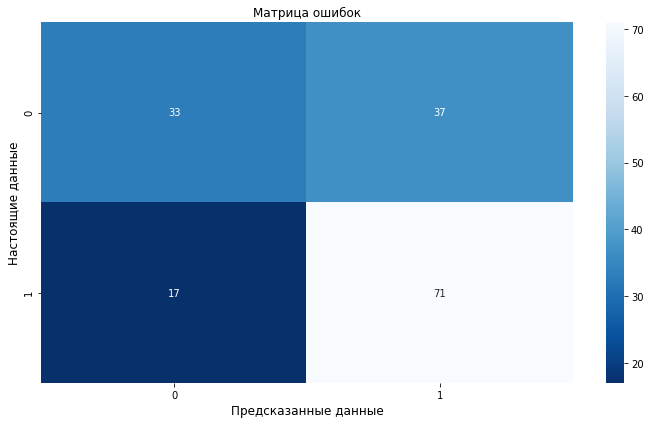

In [126]:
cm = confusion_matrix(y_test_milk, predictions_taste)
plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=12)
plt.ylabel('Настоящие данные', fontsize=12)
plt.xlabel('Предсказанные данные', fontsize=12)

plt.tight_layout()
plt.show()

**1 - вкусное молоко; 0 - невкусное молоко**

- Модель предсказала положительный класс для фактически отрицательного примера (ошибка типа I) 37 раз.
- Модель предсказала отрицательный класс для фактически положительного примера (ошибка типа II) 17 раз.

Наша модель чаще ошибается с фактически отрицательными примерами в 2 раза больше.

**Результаты не утешительные, будем менять входные признаки**

In [127]:
df_a = df_main.copy()
df_b = df_dad.copy()
milk_taste_df_2 = df_a.merge(df_b, how='left')
milk_taste_df_2['спо'] = (milk_taste_df_2['спо'] > 0.92).astype(int)
milk_taste_df_2['эке_квадрат'] = milk_taste_df_2['эке']**2

X_milk_2 = milk_taste_df_2.drop(['id','вкус_молока','удой','эке','сырой_протеин_кг','порода','имя_папы'], axis=1)
y_milk_2 = milk_taste_df_2['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

X_train_milk_2, X_test_milk_2, y_train_milk_2, y_test_milk_2 = train_test_split(X_milk_2,
                                                                       y_milk_2,
                                                                       random_state=RANDOM_STATE)

col_features_2 = ['жирность_%','белок_%','эке_квадрат']
cat_features_2 = ['спо','порода_папы_быка','возраст','тип_пастбища']

X_train_scaled_m_2 = scaler.fit_transform(X_train_milk_2[col_features_2])
X_test_scaled_m_2 = scaler.fit_transform(X_test_milk_2[col_features_2])

X_train_ohe_m_2 = encoder.fit_transform(X_train_milk_2[cat_features_2])
X_test_ohe_m_2 = encoder.fit_transform(X_test_milk_2[cat_features_2])

X_train_scaled_m_df_2 = pd.DataFrame(X_train_scaled_m_2, columns=col_features_2)
X_test_scaled_m_df_2 = pd.DataFrame(X_test_scaled_m_2, columns=col_features_2)

X_train_ohe_m_df_2 = pd.DataFrame(X_train_ohe_m_2, columns=encoder.get_feature_names_out(cat_features_2))
X_test_ohe_m_df_2 = pd.DataFrame(X_test_ohe_m_2, columns=encoder.get_feature_names_out(cat_features_2))

X_train_model_2 = pd.concat([X_train_scaled_m_df_2, X_train_ohe_m_df_2], axis=1)
X_test_model_2 = pd.concat([X_test_scaled_m_df_2, X_test_ohe_m_df_2], axis=1)

model_logic_2 = LogisticRegression()
model_logic_2.fit(X_train_model_2,y_train_milk_2)
predictions_taste_2 = model_logic_2.predict(X_test_model_2)

ac_2 = accuracy_score(y_test_milk_2, predictions_taste_2)
rc_2 = recall_score(y_test_milk_2, predictions_taste_2)
pc_2 = precision_score(y_test_milk_2, predictions_taste_2)

print('Accuracy:', ac_2.round(3))
print('Recall:', rc_2.round(3))
print('Precision:', pc_2.round(3))

Accuracy: 0.671
Recall: 0.83
Precision: 0.664


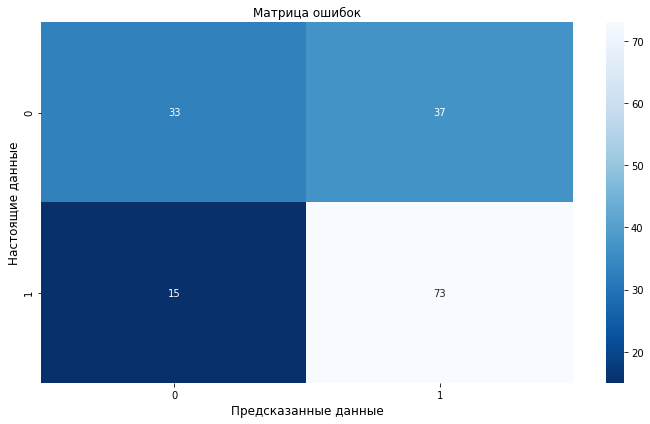

In [128]:
cm = confusion_matrix(y_test_milk_2, predictions_taste_2)
plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=12)
plt.ylabel('Настоящие данные', fontsize=12)
plt.xlabel('Предсказанные данные', fontsize=12)

plt.tight_layout()
plt.show()

**Модель стала лучше предсказывать, но она правильно оценивает только в 67% случаев. Исправить можно, только добавив новые признаки в таблицу. Теперь поработаем с Precision и максимизируем ее, поскольку нам важно, чтобы модель не ошибалась со вкусным молоком.**

**Работаем с порогом принадлежности классов:**

In [131]:
y_prob = model_logic_2.predict_proba(X_test_model_2)[:,1]
thresholds = [i*0.1 for i in range(1,10)]
best_precision = 0
best_threshold = 0

for thresh in thresholds:
    y_pred_adjusted = [1 if prob>= thresh else 0 for prob in y_prob]
    precision = precision_score(y_test_milk_2, y_pred_adjusted, zero_division=1)
    if precision > best_precision:
        best_precision = precision
        best_threshold = thresh
    
print(f"Лучший порог для максимального precision: {best_threshold}")
print(f"Максимальное значение precision при этом пороге: {best_precision}")

Лучший порог для максимального precision: 0.8
Максимальное значение precision при этом пороге: 1.0


**Итак, порог получили, теперь применим это к нашей моделе.**

In [132]:
optimal_threshold = best_threshold
y_prob_true = model_logic_2.predict_proba(X_test_model_2)[:,1]
y_pred_custom_threshold = [1 if prob >= optimal_threshold else 0 for prob in y_prob_true]
ac_new = accuracy_score(y_test_milk_2, y_pred_custom_threshold)
rc_new = recall_score(y_test_milk_2, y_pred_custom_threshold, zero_division=1)
pc_new = precision_score(y_test_milk_2, y_pred_custom_threshold, zero_division=1)

print(f"Accuracy при оптимальном пороге: {ac_new.round(3)}")
print(f"Recall при оптимальном пороге: {rc_new.round(3)}")
print(f"Precision при оптимальном пороге: {pc_new.round(3)}")

Accuracy при оптимальном пороге: 0.487
Recall при оптимальном пороге: 0.08
Precision при оптимальном пороге: 1.0


**Точность предсказаний модели снизилась, но она никогда не назовет невкусное молоко вкусным. Чтобы улучшить общую точность модели следует добавить новые признаки; возможно, увеличить выборку; для нашей объемной таблицы моэно взять порог и ниже, когда количество ошибок почти нулевое: 1-2% от общего числа наблюдений (или в нашем случае 3-5 ошибок), поскольку в нашем дата фрейме может оказаться корова с ошибочными данными, которая выдаст ложное предсказание даже при вероятности класса в 99%.**

### Теперь применим нашу модель к таблице cow_buy.csv и определим вкус молока у коров, которых фермер хочет купить!

In [144]:
cow_buy_logic = cow_buy.copy()
cow_buy_logic['белок_%'] = cow_buy_logic['текущий_уровень_белка_%']
cow_buy_logic['жирность_%'] = cow_buy_logic['текущая_жирность_%']
cow_buy_logic = cow_buy_logic.drop('текущая_жирность_%', axis=1)

milk_costil_taste = milk_taste_df_2.drop(['вкус_молока', 'id', 'удой'],axis=1)
cow_buy_logic = cow_buy_logic[milk_costil_taste.columns]
X_cow_taste = cow_buy_logic.drop(['эке','сырой_протеин_кг','порода','имя_папы', ], axis=1).copy()

X_cow_taste_scaled = scaler.transform(X_cow_taste[col_features_2])
X_cow_taste_ohe = encoder.transform(X_cow_taste[cat_features_2])

X_cow_taste_scaled_df = pd.DataFrame(X_cow_taste_scaled, columns=col_features_2)
X_cow_taste_ohe_df = pd.DataFrame(X_cow_taste_ohe, columns=encoder.get_feature_names_out(cat_features_2))

X_cow_taste_precision = pd.concat([X_cow_taste_scaled_df, X_cow_taste_ohe_df], axis=1)
X_cow_taste_precision['спо_1'] = 0
X_cow_taste_precision = X_cow_taste_precision[X_train_model_2.columns]

y_prob_taste_cow = model_logic_2.predict_proba(X_cow_taste_precision)[:,1]
y_pred_cow_taste = ['вкусно' if prob >= optimal_threshold else 'не вкусно' for prob in y_prob_taste_cow]

X_result = y_pred_cow_taste
bingo = y_pred_cow_taste.count('вкусно')
print(X_result, '\n')
print('Распределение вероятностей:', y_prob_taste_cow[:20], '\n')
print('Количество коров, которых нужно купить',bingo)

['не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'не вкусно', 'вкусно', 'не вкусно', 'не вкусно'] 

Распределение вероятностей: [0.78629773 0.75274243 0.66295735 0.57866166 0.64172547 0.26327618
 0.74304338 0.82274085 0.42445722 0.62311167 0.26990393 0.78279242
 0.64889541 0.81410859 0.24443665 0.61846646] 

Количество коров, которых нужно купить 2


**Видим, что в полученной таблице cow_buy наша модель выбирает только Двух коров со Вкусным молоком. Если задать порог в 0.75 пройдет критерии суммарно уже 5 коров, но этого порога не достаточно для точного precision и мы можем ошибиться со вкусом. Важно также правильно определиться с породой коровы, породой папы быка и возрастом коровы.**
- ***Пример коровы со вкусным молоком: холмистое пастбище, порода айдиал, порода папы тоже айдиал, ЭКЕ больше 15, СПО 0.94 и выше, жирность 3.5 и выше, возраст более 2х лет!***

## Итоговые выводы

In [165]:
cow_buy_final_results = cow_buy.copy()
cow_buy_final_results['вкус_молока'] = X_result.copy()
kek = ['удой_предикт','вкус_молока']
cow_buy_final_results[kek]

,удой_предикт,вкус_молока
0,6177.957758,не вкусно
1,5922.057321,не вкусно
2,5915.892939,не вкусно
3,6222.746880,не вкусно
4,6170.102887,не вкусно
5,5968.516486,не вкусно
7,6130.232026,не вкусно
9,6014.572175,вкусно
10,5976.504668,не вкусно
11,6176.691191,не вкусно


- **Благодаря созданным моделям и заданным параметрам для покупки коровы - нужно купить корову под индексом 9, у которой удой -> 6014.572175 кг в год, а молоко -> вкусное.**
- **Полученная модель логистической регрессии точно предсказывает только самое вкусное молоко. Но нужно работать с общим числом ошибок, сейчас ее качество достаточно низкое. У нас маловато входных параметров, необходимо добавить новые, чтобы улучшить качество модели.**
- **В ходе работы над проектом были проведены необходимые предобработки и проанализированы данные на наличие зависимостей и тенденций их распределения; успешно построена и улучшена линейная регрессионная модель для предсказания удоя коров; успешно создана и обучена логистическая модель и максимизирована ее метрика precision для безошибочного определения действительно вкусного молока.**

**Пример коровы с большим годовым удоем и вкусным молоком: холмистое пастбище, порода айдиал, порода папы тоже айдиал, ЭКЕ больше 15, СПО 0.94 и выше, жирность 3.5 и выше, возраст более 2х лет.**

- **В случае с возможными убытками, как в данном исследовании вкуса молока, лучше всего использовать метрику precision и стараться подобрать грамотный порог определения классов, чтобы система точно не выдавала невкусное молоко за вкусное.**